In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dados = pd.read_csv("iris.csv")

In [4]:
dados.iloc[2:4,1:2]

,sepal width
2,3.2
3,3.1


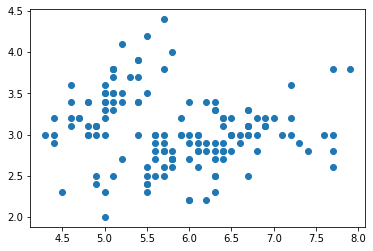

In [88]:
plt.scatter(dados["sepal length"], dados["sepal width"])

In [8]:
agrupado = dados.groupby(['class'])
agrupado.sum()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,250.3,170.9,73.2,12.2
Iris-versicolor,296.8,138.5,213.0,66.3
Iris-virginica,329.4,148.7,277.6,101.3


In [9]:
grupos = []
classes = []
for i in agrupado:
    nome = i[0]
    classes.append(nome)
    grupos.append(dados.loc[dados["class"] == nome])

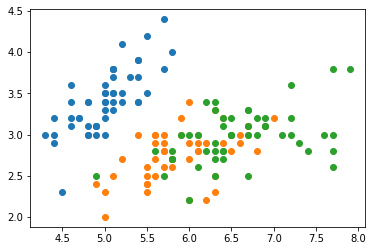

In [65]:
for grupo in grupos:
    plt.scatter(grupo["sepal length"], grupo["sepal width"])

In [75]:
dados.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

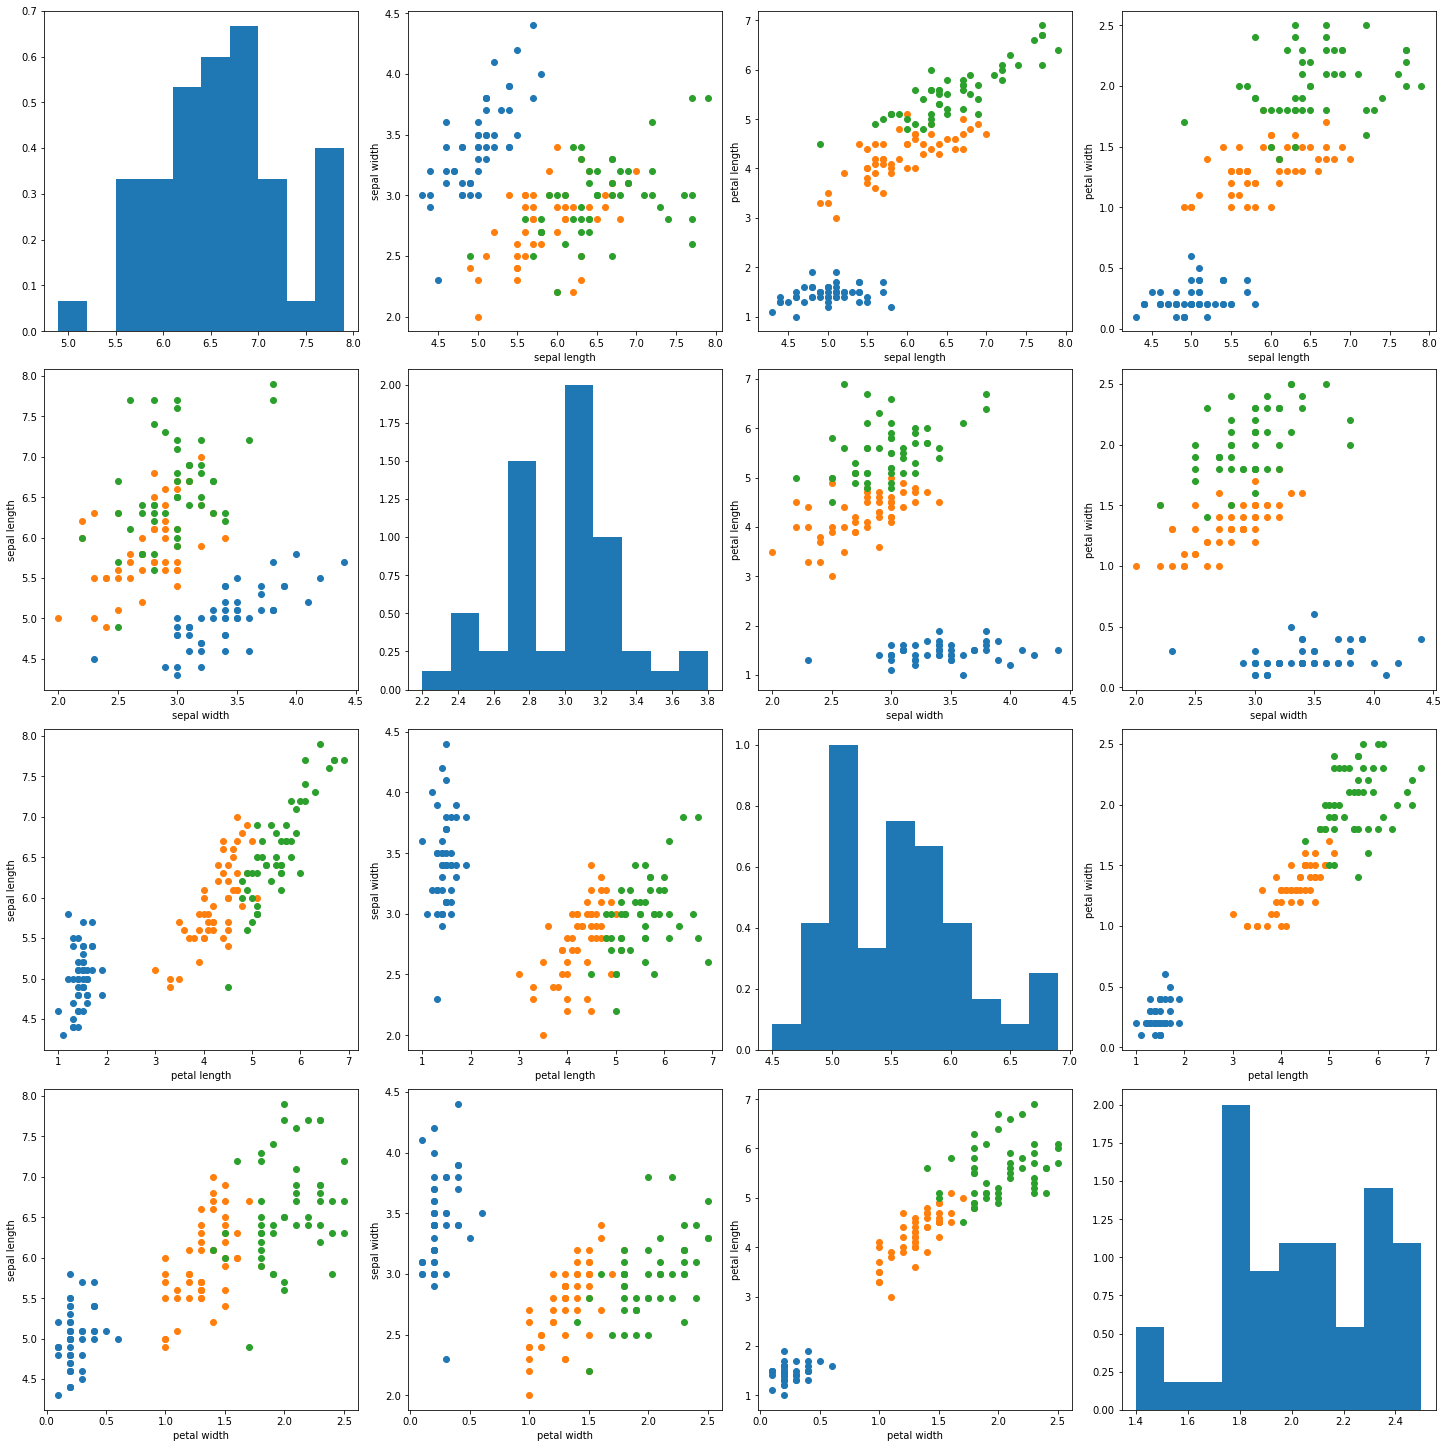

In [21]:
n = len(dados.columns) - 1
plt.figure(figsize=(20,20),constrained_layout=True)

aux = 1
for i in range(n):
    for j in range(n):
        plt.subplot(n, n, aux)
        
        aux += 1
        if(i != j):
            for grupo in grupos:
                plt.scatter(grupo[dados.columns[i]], grupo[dados.columns[j]])
                plt.xlabel(dados.columns[i])
                plt.ylabel(dados.columns[j])
        else:
            plt.hist(grupo[dados.columns[i]])
plt.show()

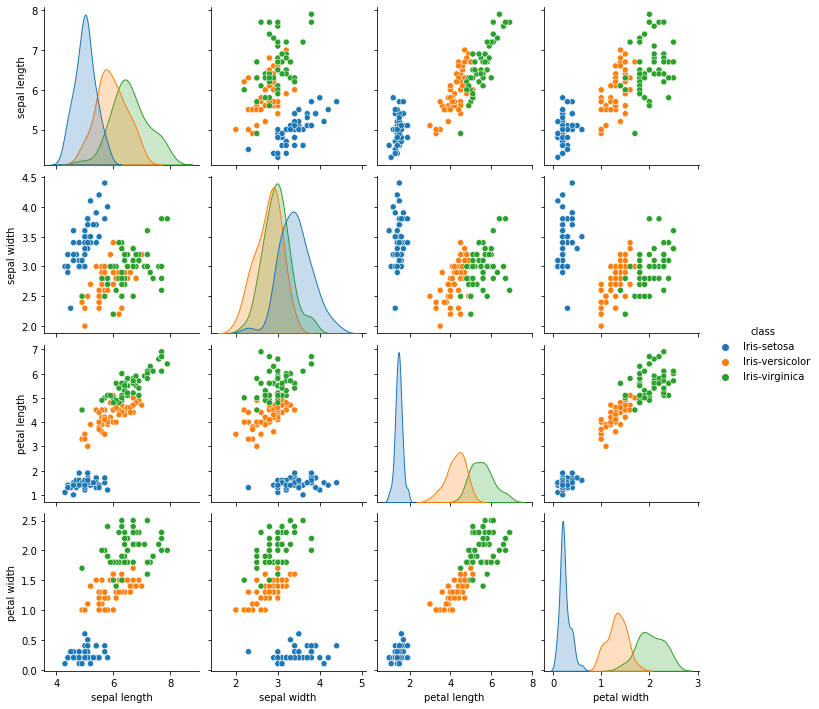

In [13]:
sns.pairplot(data=dados, hue="class")

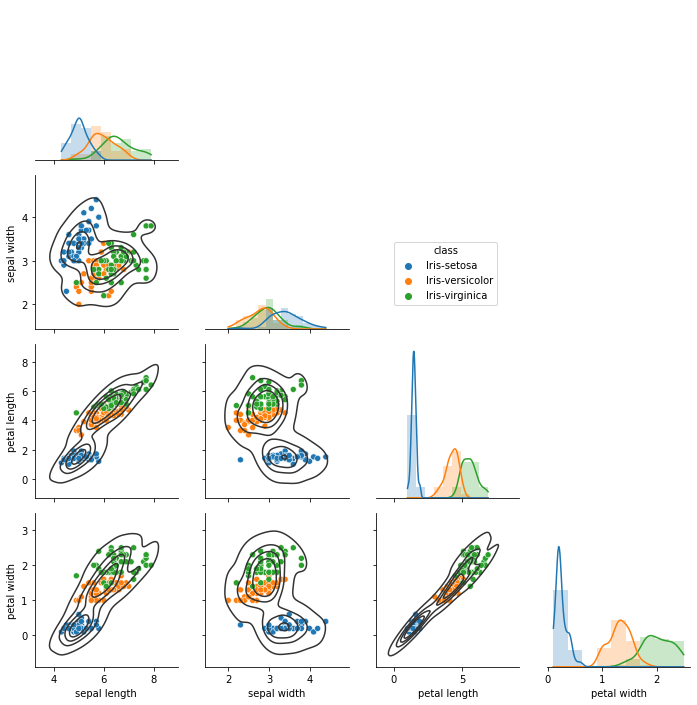

In [16]:
g = sns.PairGrid(dados, hue="class", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

In [17]:
dados

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


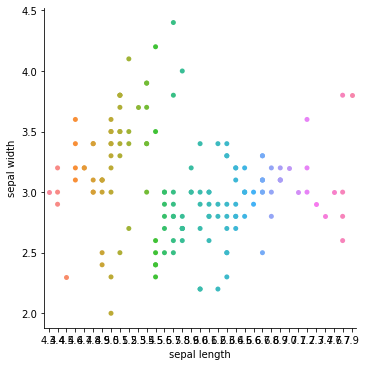

In [21]:
sns.catplot(x='sepal length', y='sepal width', data=dados., jitter=False)